<a href="https://colab.research.google.com/github/joyceee916/ATMS-597-SP-2020-Project-4/blob/master/Project4_Joyce_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
cd /content/drive/My Drive/ATMS 597/Project4

/content/drive/My Drive/ATMS 597/Project4


Importing KCMI Observational Data

In [0]:
KCMI_df = pd.read_csv("KCMI_daily_format.csv", parse_dates=True, index_col='Date')

In [0]:
KCMI_df.rename(columns={'TMAX(C)': 'Max_Temp', 'TMIN(C)': 'Min_Temp', 'WMAX(M/s)': 'Max_Wind', 'PREC(mm}': 'Total_Precip'}, inplace = True)
KCMI_df.dropna(inplace=True)
KCMI_df.index = KCMI_df.index + pd.DateOffset(hours=12)  
KCMI_df = KCMI_df.rename_axis('Time')

In [0]:
KCMI_df.head()

,Max_Temp,Min_Temp,Max_Wind,Total_Precip
Time,,,,
2010-01-01 12:00:00,-11.111111,-16.666667,6.70560,0.0
2010-01-02 12:00:00,-14.444444,-20.555556,6.70560,0.0
2010-01-03 12:00:00,-12.222222,-21.111111,4.91744,0.0
2010-01-04 12:00:00,-11.666667,-18.888889,8.94080,0.0
2010-01-05 12:00:00,-12.222222,-18.333333,7.15264,0.0


GFS Daily Model 

In [0]:
GFS_df = pd.read_csv("GFS_daily_2010_2019_test.csv", parse_dates=True, index_col='Time')
GFS_df.drop(columns="Unnamed: 0", inplace=True)
GFS_df.dropna(inplace=True)

In [0]:
GFS_df['month_sin'] = np.sin(GFS_df.index.month*(2.*np.pi/24))
GFS_df['month_cos'] = np.cos(GFS_df.index.month*(2.*np.pi/24))
GFS_df['day_sin'] = np.sin(GFS_df.index.day*(2.*np.pi/24))
GFS_df['day_cos'] = np.cos(GFS_df.index.day*(2.*np.pi/24))
GFS_df.head()

,TMAX,TMIN,WMAX,RTOT,month_sin,month_cos,day_sin,day_cos
Time,,,,,,,,
2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,0.258819,0.965926,0.258819,0.965926
2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,0.258819,0.965926,0.500000,0.866025
2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,0.258819,0.965926,0.707107,0.707107
2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,0.258819,0.965926,0.866025,0.500000
2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,0.258819,0.965926,0.965926,0.258819


GFS Surface Data

In [0]:
Surface_df = pd.read_csv("GFS_surface.csv", parse_dates=True, index_col='Time')
Surface_df.head()

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898
2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033
2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933
2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147
2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900


GFS Profile Data

In [0]:
Profile_df = pd.read_csv("GFS_profile.csv", parse_dates=True, index_col='Time')
Profile_df.head()

,DWPC,HGHT,PRES,TMPC,UWND,VWND
Time,,,,,,
2010-01-02 06:00:00,"[-17.885416666666668, -22.15150234741784, -38....","[822.2693055555555, 1460.1033333333335, 2904.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.249583333333334, -16.52291079812207, -21....","[10.566530573750587, 4.214706046596407, 17.668...","[-21.60349159268254, -18.30022411700173, -29.5..."
2010-01-02 09:00:00,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29...."
2010-01-02 12:00:00,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32..."
2010-01-02 15:00:00,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38...."
2010-01-02 18:00:00,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37..."


In [0]:
GFS_profile = pd.read_csv('GFS_profile.csv', index_col='Time', parse_dates=True)
h=GFS_profile.DWPC.str.strip('[|]|,').values

def extract_var_GFS_profile(var, level):
    list = []
    levels = [925.0, 850.0, 700.0, 500.0, 250.0, 100.0]
    x = levels.index(level)
    for i in range(0,len(GFS_profile)):
        e = h[i].split(',')[x]
        list.append(e)
    new_col_name = var + '_' + str(level)
    GFS_profile[new_col_name]=list

In [0]:
extract_var_GFS_profile('DWPC', 850.0)

In [0]:
GFS_profile

,DWPC,HGHT,PRES,TMPC,UWND,VWND,DWPC_850.0
Time,,,,,,,
2010-01-02 06:00:00,"[-17.885416666666668, -22.15150234741784, -38....","[822.2693055555555, 1460.1033333333335, 2904.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.249583333333334, -16.52291079812207, -21....","[10.566530573750587, 4.214706046596407, 17.668...","[-21.60349159268254, -18.30022411700173, -29.5...",-22.15150234741784
2010-01-02 09:00:00,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29....",-24.9388679245283
2010-01-02 12:00:00,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32...",-29.536603773584904
2010-01-02 15:00:00,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38....",-37.651971830985914
2010-01-02 18:00:00,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37...",-32.677452830188685
...,...,...,...,...,...,...,...
2020-02-01 18:00:00,"[-2.420708661417323, -9.530575916230358, -24.0...","[742.415748031496, 1411.5072251308898, 2941.86...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.2914960629921257, -2.228062827225135, -8.0...","[19.811216208528656, 21.260362044096723, 30.08...","[1.3604678475628496, -12.77327158763928, -28.9...",-9.530575916230358
2020-02-01 21:00:00,"[-2.7182608695652157, -14.782617801047117, -18...","[728.3838260869561, 1400.3076963350782, 2936.0...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.0765217391304316, -0.4961256544502628, -7....","[23.064567282086532, 29.518982185029717, 36.16...","[0.7999300627093688, -17.180421782239765, -26....",-14.782617801047117
2020-02-02 00:00:00,"[-2.8084210526315774, -24.81340314136124, -15....","[732.0842105263156, 1408.2601570680624, 2948.3...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.6178947368421035, 1.2138219895287963, -6.8...","[25.1585312681121, 28.268556591902666, 33.6927...","[-1.6826343774112273, -18.266906968792057, -26...",-24.81340314136124


Create Feature Matrix

In [0]:
# Combine GFS daily and KCMI daily
features_df = pd.merge(GFS_df.reset_index(), KCMI_df.reset_index(), on='Time', how='inner')
features_df.Time = pd.to_datetime(features_df.Time)
features_df['Year'] = features_df.Time.dt.year
features_df['D_TMAX'] = features_df['TMAX']-features_df['Max_Temp']
features_df['D_TMIN'] = features_df['TMIN']-features_df['Min_Temp']
features_df['D_WMAX'] = features_df['WMAX']-features_df['Max_Wind']
features_df['D_RTOT'] = features_df['RTOT']-features_df['Total_Precip']

In [0]:
features_df.head()

,Time,TMAX,TMIN,WMAX,RTOT,month_sin,month_cos,day_sin,day_cos,Max_Temp,Min_Temp,Max_Wind,Total_Precip,Year,D_TMAX,D_TMIN,D_WMAX,D_RTOT
0,2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,0.258819,0.965926,0.258819,0.965926,-11.111111,-16.666667,6.70560,0.0,2010,-0.148889,0.206667,0.618333,0.05
1,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,0.258819,0.965926,0.500000,0.866025,-14.444444,-20.555556,6.70560,0.0,2010,4.284444,4.595556,-2.018383,0.00
2,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,0.258819,0.965926,0.707107,0.707107,-12.222222,-21.111111,4.91744,0.0,2010,2.262222,6.751111,1.023940,0.06
3,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,0.258819,0.965926,0.866025,0.500000,-11.666667,-18.888889,8.94080,0.0,2010,3.206667,6.028889,-3.255732,0.17
4,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,0.258819,0.965926,0.965926,0.258819,-12.222222,-18.333333,7.15264,0.0,2010,5.062222,7.273333,-3.357907,0.77


In [0]:
# Combine GFS daily and KCMI daily
GFS_df_new = pd.merge(Surface_df.reset_index(), Profile_df.reset_index(), on='Time', how='inner')
GFS_df_new.Time = pd.to_datetime(GFS_df_new.Time)

In [0]:
GFS_df_new.head()

,Time,DWPC_x,HCLD,LCLD,MCLD,PRCP,PRES_x,TMPC_x,UWND_x,VWND_x,WSPD,DWPC_y,HGHT,PRES_y,TMPC_y,UWND_y,VWND_y
0,2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898,"[-17.885416666666668, -22.15150234741784, -38....","[822.2693055555555, 1460.1033333333335, 2904.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.249583333333334, -16.52291079812207, -21....","[10.566530573750587, 4.214706046596407, 17.668...","[-21.60349159268254, -18.30022411700173, -29.5..."
1,2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29...."
2,2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32..."
3,2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38...."
4,2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37..."


In [0]:
# Split into training and test sets 
# Can change features 
x_train_all = features_df[features_df.Time.dt.year<2019]
x_test_all = features_df[features_df.Time.dt.year==2019]

y_train_all = features_df[features_df.Time.dt.year<2019]
y_test_all = features_df[features_df.Time.dt.year==2019]

Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [0]:
# Create linear regression model 
lin_model = LinearRegression()

# pick variables 
features = ['TMAX', 'TMIN', 'WMAX','month_sin', 'month_cos']
target = ['Max_Temp']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

lin_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print('Coefficients: \n', lin_model.coef_)
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, lin_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))

Coefficients: 
 [[ 0.40140493  0.49302013  0.14403299  7.05578278 -1.80949872]]
The Mean Absolute Error: 3.18 degrees celsius
The Median Absolute Error: 2.40 degrees celsius
The Root Mean Square Error: 4.14 degrees celsius 
Coefficient of determination: 0.88


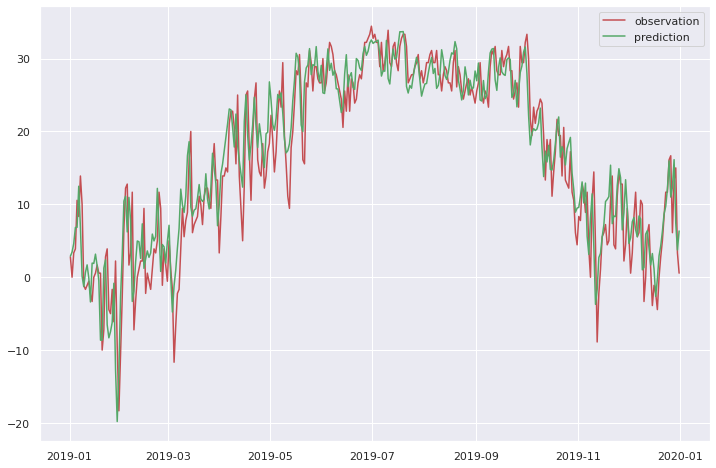

In [0]:
# Plot predicted values against observed values 
time = features_df[features_df['Year']==2019]['Time'].values
plt.figure(figsize=(12,8))
plt.plot(time, y_test, c='r', label='observation')
plt.plot(time, lin_model.predict(x_test), c='g', label='prediction')
plt.legend()
plt.savefig('linearregression.jpg')
plt.show()

Random Forest

In [0]:
# Create random forest regression model 
# some code adapted from (https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
from sklearn.ensemble import RandomForestRegressor 

features = ['TMAX', 'TMIN', 'WMAX', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'D_TMAX', 'D_TMIN', 'D_RTOT', 'D_WMAX']
target = ['Max_Temp']

x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

# TODO could create empty numpy arrays and then plot the effect of changing estimators and max features on the errors (4 metrics)
n_estimators = [1, 10, 100]
max_features = [1, 2, 3]
for n in n_estimators: 
    for m in max_features: 
        # Train the model 
        rf_model = RandomForestRegressor(n_estimators=n, max_features=m)
        rf_model.fit(x_train, y_train)

        # Print parameters and plot
        print("# of trees =", n)
        print("Max features = ", m)
        print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, rf_model.predict(x_test)))
        print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, rf_model.predict(x_test)))
        print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, rf_model.predict(x_test))))
        print('Coefficient of determination: %.2f' % r2_score(y_test, rf_model.predict(x_test)))

print(sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), features), reverse=True))
print(sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), features), reverse=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed whe

# of trees = 1
Max features =  1
The Mean Absolute Error: 3.51 degrees celsius
The Median Absolute Error: 2.22 degrees celsius
The Root Mean Square Error: 5.05 degrees celsius 
Coefficient of determination: 0.82
# of trees = 1
Max features =  2
The Mean Absolute Error: 2.59 degrees celsius
The Median Absolute Error: 1.67 degrees celsius
The Root Mean Square Error: 3.66 degrees celsius 
Coefficient of determination: 0.91
# of trees = 1
Max features =  3
The Mean Absolute Error: 2.41 degrees celsius
The Median Absolute Error: 1.67 degrees celsius
The Root Mean Square Error: 3.49 degrees celsius 
Coefficient of determination: 0.91
# of trees = 10
Max features =  1
The Mean Absolute Error: 2.25 degrees celsius
The Median Absolute Error: 1.61 degrees celsius
The Root Mean Square Error: 3.01 degrees celsius 
Coefficient of determination: 0.94
# of trees = 10
Max features =  2
The Mean Absolute Error: 1.49 degrees celsius
The Median Absolute Error: 1.06 degrees celsius
The Root Mean Square Er

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  1
The Mean Absolute Error: 1.81 degrees celsius
The Median Absolute Error: 1.36 degrees celsius
The Root Mean Square Error: 2.45 degrees celsius 
Coefficient of determination: 0.96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  2
The Mean Absolute Error: 1.29 degrees celsius
The Median Absolute Error: 0.96 degrees celsius
The Root Mean Square Error: 1.80 degrees celsius 
Coefficient of determination: 0.98


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  3
The Mean Absolute Error: 1.00 degrees celsius
The Median Absolute Error: 0.73 degrees celsius
The Root Mean Square Error: 1.44 degrees celsius 
Coefficient of determination: 0.99
[(0.3537, 'TMAX'), (0.3189, 'TMIN'), (0.1141, 'month_sin'), (0.0866, 'month_cos'), (0.0739, 'D_TMAX'), (0.0178, 'D_TMIN'), (0.0127, 'WMAX'), (0.0097, 'D_RTOT'), (0.0065, 'D_WMAX'), (0.0031, 'day_sin'), (0.0029, 'day_cos')]


TypeError: ignored

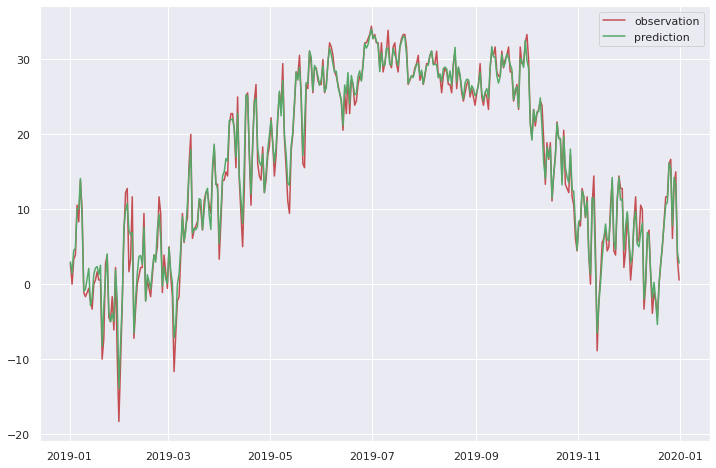

In [0]:
# Plot predicted values against observed values 
time = features_df[features_df['Year']==2019]['Time'].values
plt.figure(figsize=(12,8))
plt.plot(time, y_test, c='r', label='observation')
plt.plot(time, rf_model.predict(x_test), c='g', label='prediction')
plt.legend()
plt.savefig('randomforest.jpg')
plt.show()